In [1]:
import pyparax as parax
import numpy as np 
import pandas as pd
import scipy as sp
from math import pi
import matplotlib.pyplot as plt
import cmath
from scipy.optimize import leastsq

In [2]:
# Import test sample
field_center = np.loadtxt('E_20.csv',delimiter=',',dtype=complex)

In [3]:
field_center_raw = field_center[22-16:20+14,44-16:40+16]

In [4]:
# Set experimental parameters
lambda_= 1.3e-10
pitch = 3e-4/64
#grid_dim = field_center_raw.shape[0]
grid_dim = 32
window_extent = pitch*grid_dim

In [5]:
# Build sampling criterion based off propagation distances
z_props = np.linspace(1,18,69)
z_props

array([ 1.  ,  1.25,  1.5 ,  1.75,  2.  ,  2.25,  2.5 ,  2.75,  3.  ,
        3.25,  3.5 ,  3.75,  4.  ,  4.25,  4.5 ,  4.75,  5.  ,  5.25,
        5.5 ,  5.75,  6.  ,  6.25,  6.5 ,  6.75,  7.  ,  7.25,  7.5 ,
        7.75,  8.  ,  8.25,  8.5 ,  8.75,  9.  ,  9.25,  9.5 ,  9.75,
       10.  , 10.25, 10.5 , 10.75, 11.  , 11.25, 11.5 , 11.75, 12.  ,
       12.25, 12.5 , 12.75, 13.  , 13.25, 13.5 , 13.75, 14.  , 14.25,
       14.5 , 14.75, 15.  , 15.25, 15.5 , 15.75, 16.  , 16.25, 16.5 ,
       16.75, 17.  , 17.25, 17.5 , 17.75, 18.  ])

In [6]:
# Compute Fresnel numbers
N_Fs = (window_extent/2)**2/(lambda_*z_props)
N_Fs

array([43.26923077, 34.61538462, 28.84615385, 24.72527473, 21.63461538,
       19.23076923, 17.30769231, 15.73426573, 14.42307692, 13.31360947,
       12.36263736, 11.53846154, 10.81730769, 10.18099548,  9.61538462,
        9.10931174,  8.65384615,  8.24175824,  7.86713287,  7.52508361,
        7.21153846,  6.92307692,  6.65680473,  6.41025641,  6.18131868,
        5.96816976,  5.76923077,  5.58312655,  5.40865385,  5.24475524,
        5.09049774,  4.94505495,  4.80769231,  4.67775468,  4.55465587,
        4.43786982,  4.32692308,  4.22138837,  4.12087912,  4.02504472,
        3.93356643,  3.84615385,  3.76254181,  3.68248773,  3.60576923,
        3.5321821 ,  3.46153846,  3.39366516,  3.32840237,  3.26560232,
        3.20512821,  3.14685315,  3.09065934,  3.03643725,  2.98408488,
        2.93350717,  2.88461538,  2.83732661,  2.79156328,  2.74725275,
        2.70432692,  2.66272189,  2.62237762,  2.58323766,  2.54524887,
        2.5083612 ,  2.47252747,  2.43770314,  2.40384615])

In [7]:
#Ms = np.log10(N_Fs)*180
#Ms = np.log1o(N_Fs)*180 + 20

In [8]:
# Ad hoc fit to Goodman's N,M,Q istomic aliasing 
# Sampling points of the non-padded signal
Ms = np.log10(N_Fs)*290 - 40
Ms = Ms.astype(int)
Ms

array([434, 406, 383, 364, 347, 332, 319, 307, 296, 286, 276, 268, 259,
       252, 245, 238, 231, 225, 219, 214, 208, 203, 198, 193, 189, 184,
       180, 176, 172, 168, 164, 161, 157, 154, 150, 147, 144, 141, 138,
       135, 132, 129, 126, 124, 121, 118, 116, 113, 111, 109, 106, 104,
       102,  99,  97,  95,  93,  91,  89,  87,  85,  83,  81,  79,  77,
        75,  74,  72,  70])

In [9]:
# Round to even numbers
Ms = Ms + Ms%2
Ms

array([434, 406, 384, 364, 348, 332, 320, 308, 296, 286, 276, 268, 260,
       252, 246, 238, 232, 226, 220, 214, 208, 204, 198, 194, 190, 184,
       180, 176, 172, 168, 164, 162, 158, 154, 150, 148, 144, 142, 138,
       136, 132, 130, 126, 124, 122, 118, 116, 114, 112, 110, 106, 104,
       102, 100,  98,  96,  94,  92,  90,  88,  86,  84,  82,  80,  78,
        76,  74,  72,  70])

In [10]:
# Compute sampling ratios
Qs = Ms/(4*N_Fs)
Qs

array([2.50755556, 2.93222222, 3.328     , 3.68044444, 4.02133333,
       4.316     , 4.62222222, 4.89377778, 5.13066667, 5.37044444,
       5.58133333, 5.80666667, 6.00888889, 6.188     , 6.396     ,
       6.53177778, 6.70222222, 6.85533333, 6.99111111, 7.10955556,
       7.21066667, 7.36666667, 7.436     , 7.566     , 7.68444444,
       7.70755556, 7.8       , 7.88088889, 7.95022222, 8.008     ,
       8.05422222, 8.19      , 8.216     , 8.23044444, 8.23333333,
       8.33733333, 8.32      , 8.40955556, 8.372     , 8.44711111,
       8.38933333, 8.45      , 8.372     , 8.41822222, 8.45866667,
       8.35177778, 8.37777778, 8.398     , 8.41244444, 8.42111111,
       8.268     , 8.26222222, 8.25066667, 8.23333333, 8.21022222,
       8.18133333, 8.14666667, 8.10622222, 8.06      , 8.008     ,
       7.95022222, 7.88666667, 7.81733333, 7.74222222, 7.66133333,
       7.57466667, 7.48222222, 7.384     , 7.28      ])

In [11]:
# Sampling points of the total padded-zero included signal
Ns = (Qs*Ms).astype(int)
Ns = Ns + Ns%2
Ns

array([1088, 1190, 1278, 1340, 1400, 1432, 1480, 1508, 1518, 1536, 1540,
       1556, 1562, 1560, 1574, 1554, 1554, 1550, 1538, 1522, 1500, 1502,
       1472, 1468, 1460, 1418, 1404, 1388, 1368, 1346, 1320, 1326, 1298,
       1268, 1236, 1234, 1198, 1194, 1156, 1148, 1108, 1098, 1054, 1044,
       1032,  986,  972,  958,  942,  926,  876,  860,  842,  824,  804,
        786,  766,  746,  726,  704,  684,  662,  642,  620,  598,  576,
        554,  532,  510])

Text(0.5, 0, '$N_F$')

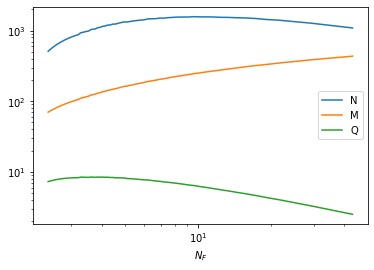

In [12]:
# Plot to compare to Goodman's
plt.loglog(N_Fs,Ns)
plt.loglog(N_Fs,Ms)
plt.loglog(N_Fs,Qs)
plt.legend(['N','M','Q'])
plt.xlabel('$N_F$')

In [13]:
from scipy.interpolate import interp2d

def propagate_series(field_center,z_props,Ns,Ms,full_output=False):
    # Function to handle sampling considerations for the propagation distance series 
    # Returns series of output plane fields as well as z_props,Ns,Ms with full_output
    # have to separately interpolate real and imag
    
    x = np.linspace(-window_extent/2,window_extent/2,field_center.shape[0])
    y = x
    u_spline_real = interp2d(x,y,np.real(field_center),kind='cubic')
    u_spline_imag = interp2d(x,y,np.imag(field_center),kind='cubic')
    f_lst = []
    for N,M,z in zip(Ns,Ms,z_props):
        parax.numeric_parameters.wavelength=lambda_*1000
        parax.numeric_parameters.dx = 1000*window_extent/M
        parax.numeric_parameters.dy = 1000*window_extent/M
        parax.numeric_parameters.dz = z*1000
        parax.numeric_parameters.N_x = N
        parax.numeric_parameters.N_y = N
        parax.numeric_parameters.N_z = 1
        x_M = np.linspace(-window_extent/2,window_extent/2,M)
        y_M = x_M
        xx_M,yy_M = np.meshgrid(x_M, y_M)
        field_center_real = u_spline_real(xx_M[0,:],yy_M[:,0])
        field_center_imag = u_spline_imag(xx_M[0,:],yy_M[:,0])
        field_center_M = field_center_real+1j*field_center_imag
        f0 = 1j*np.zeros((N,N))
        f0[N//2-M//2:N//2+M//2,N//2-M//2:N//2+M//2] = field_center_M
        system = [int(z*1000)]
        f = parax.experimental_simulator.experimental_simulator_2d.propagate(f0, system, output_full = True, forward = False, print_output=False)
        f_lst.append(f[-1])
    if full_output==True:
        return f_lst,z_props,Ns,Ms
    else:
        return f_lst

In [14]:
def param_se(pfit,pcov,x,y,function):
    # Function to compute the error based on covariance
    # Takes the fit and covariance matrix along with the data and function form
    # Returns the standard error of the latent variables
    err_f = lambda pfit,x,y:y-function(x,*pfit)
    var_res = np.sum((err_f(pfit,x,y))**2)/(len(y)-len(pcov))
    param_se = np.array([np.sqrt(pcov[i,i]*var_res) for i in range(len(pcov))])
    return param_se

def bootstrap_param_se(pfit,pcov,x,y,function):
    # Function to compute the error based on bootstrapping
    # Takes the fit and covariance matrix along with the data and function form
    # Returns the standard error of the latent variables    
    err_f = lambda pfit,x,y:y-function(x,*pfit)
    res_se = np.std(err_f(pfit,x,y))
    bootstrap_se_lst = []
    for i in range(100):
        y_random_err = np.random.normal(0,res_se,len(y))
        y_random = y+y_random_err
        random_fit,_ = leastsq(err_f,pfit,args=(x,y_random))
        bootstrap_se_lst.append(random_fit)
    param_se = np.std(np.array(bootstrap_se_lst),axis=0)
    return param_se


In [15]:
def get_amp_i_fit(marg_pmf,l,bootstrap):
    # Function to get the individual amplitude fit for single coordinate analysis of propagation
    # Takes the marginal pmf representing the data, the spatial samples of the axis of the total padding included signal, and the boolean option to bootstrap the fit error
    # returns the latent variables and their respective error
    Ei = np.sum(marg_pmf*l)
    p0 = [1e-5,Ei,1e-5]
    pfit,pcov = leastsq(marg_residual,p0,args=(l,marg_pmf),full_output=1)[:2]
    if bootstrap:
        pse = bootstrap_param_se(pfit,pcov,l,marg_pmf,marg_fit)
    else:
        pse = param_se(pfit,pcov,l,marg_pmf,marg_fit)
        
    if np.all(pfit!=None):
        return pfit,pse
    else:
        return np.nan*np.ones(3),np.nan*np.ones(3)

def marg_residual(p,x,marg_pmf):
    # Corresponding residual function to aid in the get_amp_i_fit function
    # Takes the parameters and data
    # Computes the difference to the supposed functional form marg_fit
    A,x0,w = p
    marg_hat = marg_fit(x,A,x0,w)
    return marg_pmf - marg_hat

def marg_fit(x,A,x0,w):
    # Function for leastsq fit
    return A*np.exp(-(x-x0)**2/w**2)/w


In [16]:
def fit_astigmatic_field(fi,bootstrap,grid_dim):
    # Harness to handle fitting the separate transverse dimensions according to GH decomp amplitude
    # Takes in the full padding included signal, boolean option to compute error via bootsrap and the dimension associated with the propagated field's sampling in the non-padded signal
    # Returns the fit associated the two transverse coordinates and their errors
    abs_fi = np.abs(fi)
    pmf = abs_fi/np.sum(abs_fi)
    fi_window_extent = window_extent*fi.shape[0]/grid_dim
    l = np.linspace(-fi_window_extent/2,fi_window_extent/2,fi.shape[0])
    marg_x = np.sum(pmf,axis=0)
    marg_y = np.sum(pmf,axis=1)
    pfit_amp_x,pse_amp_x = get_amp_i_fit(marg_x,l,bootstrap)
    pfit_amp_y,pse_amp_y = get_amp_i_fit(marg_y,l,bootstrap) 
    #Ex = np.sum(l*marg_x)
    #Ey = np.sum(l*marg_y)
    return pfit_amp_x,pse_amp_x,pfit_amp_y,pse_amp_y

def prop_astigmatic_fit_adaptive(E,z_props,Ns,Ms,full_output=True,bootstrap=True):
    # Takes an 2D field as a grid and propagates it according to a series of z_props distances with their respective sampling requirements contained in Ns and Ms
    # Returns fit for gauss beam as well as the propagaton series subject to full_output
    f_series = propagate_series(E,z_props,Ns,Ms)
    fit_amp_x_lst = []
    fit_amp_y_lst = []
    se_amp_x_lst = []
    se_amp_y_lst = []
    #f_proper = []
    for i,fi in enumerate(f_series):
        #fi_subset = fi#[padded_dim//2-grid_dim//2:padded_dim//2+grid_dim//2,padded_dim//2-grid_dim//2:padded_dim//2+grid_dim//2]
        pfit_amp_x,pse_amp_x,pfit_amp_y,pse_amp_y = fit_astigmatic_field(fi,bootstrap,Ms[i])
        fit_amp_x_lst.append(pfit_amp_x)
        fit_amp_y_lst.append(pfit_amp_y)
        se_amp_x_lst.append(pse_amp_x)
        se_amp_y_lst.append(pse_amp_y)
        #f_proper.append(fi_subset)
    if full_output:
        return fit_amp_x_lst,se_amp_x_lst,fit_amp_y_lst,se_amp_y_lst,f_series
    else:
        return fit_amp_x_lst,se_amp_x_lst,fit_amp_y_lst,se_amp_y_lst

In [17]:
def gauss_beam_phase(x,a,x0,y0,R):
# A 2D mesh, x, describing the domain over which the amplitude is defined
# A phase shift constant representative of the superfluous -kz + arctan(z/zR) term
# The center of the beam slice described by two floating point numbers, x0 and y0, for the x and y axes respectively
# The radius of curvature for beam slice
    return (a-pi*((x[0]-x0)**2+(x[1]-y0)**2)/(R*lambda_))

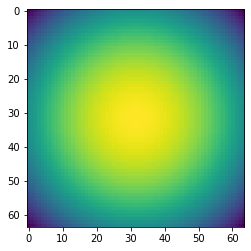

In [63]:
parax.numeric_parameters.wavelength=lambda_*1000
parax.numeric_parameters.dx = 1000*window_extent/grid_dim
parax.numeric_parameters.dy = 1000*window_extent/grid_dim
parax.numeric_parameters.N_x = grid_dim*2
parax.numeric_parameters.N_y = grid_dim*2
X = np.meshgrid(np.linspace(-window_extent,window_extent,2*grid_dim),np.linspace(-window_extent,window_extent,2*grid_dim))
phase = gauss_beam_phase(X,1,0,0,11)
field_center_raw = parax.function_generator.standard_initial_conditions.generate_gauss_2d(0,0,window_extent*300,window_extent*300)*np.exp(1j*phase)
plt.imshow(np.unwrap(np.unwrap(np.angle(field_center_raw),axis=0),axis=1))
#plt.imshow(np.abs(field_center_raw))

In [112]:
# Option to use simulated sample from previous code

# field_center = np.loadtxt('gauss_sim.csv', delimiter=',',dtype=complex)
# plt.imshow(np.abs(field_center[90:210,90:210]))
# field_center_raw = field_center[90:210,90:210]
# field_center_raw.shape

In [64]:
fit_amp_x_lst,se_amp_x_lst,fit_amp_y_lst,se_amp_y_lst,f = prop_astigmatic_fit_adaptive(field_center_raw,z_props[12:],Ns[12:],Ms[12:])

[['normal', 'normal']]
Propagate for 4000 units [mm]
Step 0/1
[['normal', 'normal']]
Propagate for 4250 units [mm]
Step 0/1
[['normal', 'normal']]
Propagate for 4500 units [mm]
Step 0/1
[['normal', 'normal']]
Propagate for 4750 units [mm]
Step 0/1
[['normal', 'normal']]
Propagate for 5000 units [mm]
Step 0/1
[['normal', 'normal']]
Propagate for 5250 units [mm]
Step 0/1
[['normal', 'normal']]
Propagate for 5500 units [mm]
Step 0/1
[['normal', 'normal']]
Propagate for 5750 units [mm]
Step 0/1
[['normal', 'normal']]
Propagate for 6000 units [mm]
Step 0/1
[['normal', 'normal']]
Propagate for 6250 units [mm]
Step 0/1
[['normal', 'normal']]
Propagate for 6500 units [mm]
Step 0/1
[['normal', 'normal']]
Propagate for 6750 units [mm]
Step 0/1
[['normal', 'normal']]
Propagate for 7000 units [mm]
Step 0/1
[['normal', 'normal']]
Propagate for 7250 units [mm]
Step 0/1
[['normal', 'normal']]
Propagate for 7500 units [mm]
Step 0/1
[['normal', 'normal']]
Propagate for 7750 units [mm]
Step 0/1
[['norma

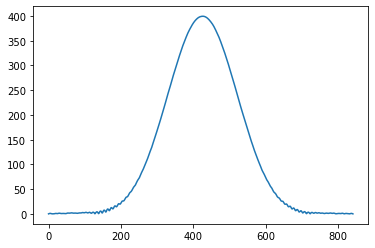

In [82]:
plt.plot(np.abs(np.sum(f[40],axis=0)))

Text(0.5, 1.0, '$\\Delta z = $16.75')

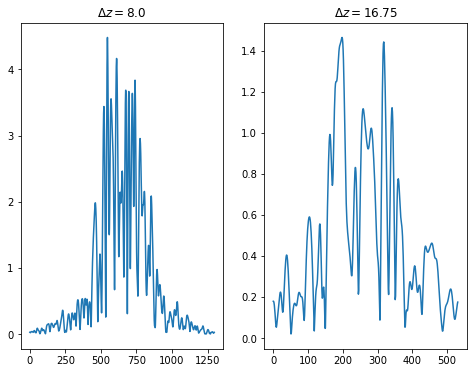

In [44]:
plt.figure(figsize=(8,6))
k = 20
plt.subplot(1,2,1)
plt.plot(np.abs(f[k])[:,Ns[k]//2])
plt.title('$\Delta z = $'+str(3+k*.25))
k = 55
plt.subplot(1,2,2)
plt.plot(np.abs(f[k])[:,Ns[k]//2])
plt.title('$\Delta z = $'+str(3+k*.25))

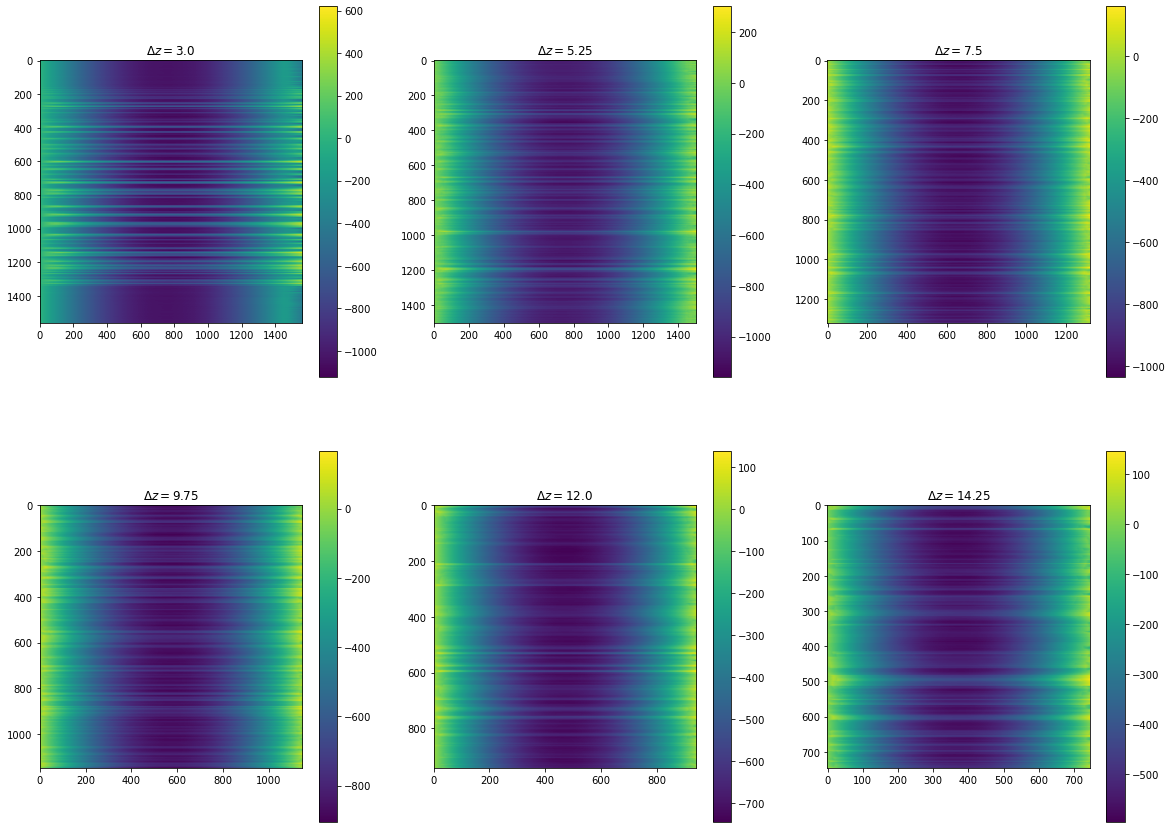

In [45]:
plt.figure(figsize=(20,15))
for i in range(6):
    plt.subplot(2,3,i+1)
    plt.imshow(np.unwrap(np.angle(f[i*9])))
    plt.colorbar()
    plt.title('$\Delta z = $'+str(3+i*9*.25))

Text(0, 0.5, '$w_x(z)$ (m)')

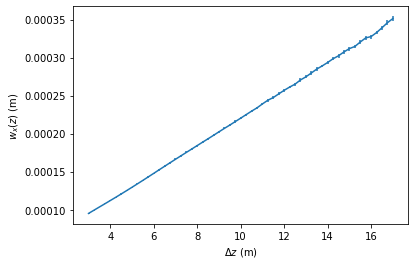

In [46]:
plt.errorbar(0.25*np.arange(12,len(fit_amp_x_lst)+12)[:],np.array(fit_amp_x_lst)[:,2],yerr=np.array(se_amp_x_lst)[:,2])
plt.xlabel('$\Delta z$ (m)')
plt.ylabel('$w_x(z)$ (m)')

Text(0, 0.5, '$w_y(z)$ (m)')

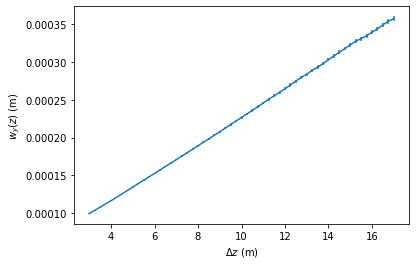

In [47]:
plt.errorbar(.25*np.arange(12,len(fit_amp_y_lst)+12),np.array(fit_amp_y_lst)[:,2],yerr=np.array(se_amp_y_lst)[:,2])
plt.xlabel('$\Delta z$ (m)')
plt.ylabel('$w_y(z)$ (m)')

In [18]:
def wz_fit(z,w0,z0,wavelen):
    # Function for least squares fitting
    zR = pi*w0**2/wavelen
    return w0*(1+((z-z0)/zR)**2)**0.5

def wz_residual(p,z,w):
    # Residual function to be fit
    # Takes the parameter estimates and the previous propagation based fit for the w profile
    # Returns difference of the fit function from the propagated values
    w0,z0,wavelen = p
    w_hat = wz_fit(z,w0,z0,wavelen)
    return w-w_hat

def get_w0(w_arr,full_output=False,step_size=250,bootstrap=False):
    # Harness for determining w0 and z0 fit based on full w profile
    # Takes the w_arr profile, a full output boolean to return a graph, step_size variable to scale the x axis and bootstrap boolean to determine the method for fit error calculation
    z = [i*step_size/1000 for i,w in enumerate(w_arr) if np.logical_not(np.isnan(w))]
    w = w_arr[np.logical_not(np.isnan(w_arr))]
    p0 = [0.01,30,lambda_]
    pfit,pcov = leastsq(wz_residual,p0,args=(z,w),full_output=1)[:2]
    if bootstrap:
        pse = bootstrap_param_se(pfit,pcov,z,w,wz_fit)
    else:
        pse = param_se(pfit,pcov,z,w,wz_fit)
    if full_output:
        plt.plot(z,np.abs(w))
        plt.plot(z,wz_fit(z,*pfit))
        plt.xlabel('$\Delta z$ (m)')
        plt.ylabel('$w(z)$ (m)')
        return pfit,pse
    else:
        return pfit,pse
    

w0y = 0.00022753713530863524 , z0y = 0.9812147046685631 , wavelen = -4.4134106053538023e-14


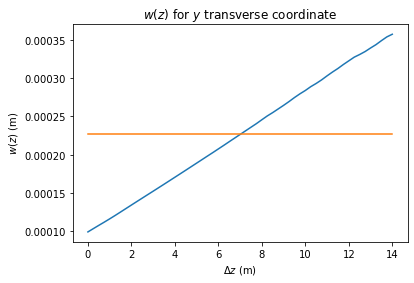

In [49]:
fit_w0y, se_w0y = get_w0(np.array(fit_amp_y_lst)[:,2],bootstrap=True,full_output=True)
plt.title('$w(z)$ for $y$ transverse coordinate')
w0y,z0y,wavelen = fit_w0y
print('w0y =',w0y, ', z0y =',z0y+4,  ', wavelen =',wavelen)

In [60]:
se_w0y

array([5.11186307e-08, 6.84819168e-03, 8.24854937e-13])

### Separate Pulse Analysis

In [19]:
# Loads more explict 2 pulse example
field_center = np.loadtxt('E_2pulse.csv', delimiter=',',dtype=complex)

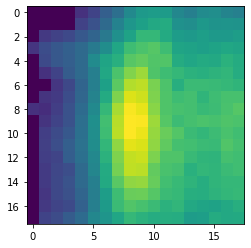

In [18]:
plt.imshow(np.abs(field_center[32-9:32+9,:18]))

In [19]:
field_left_peak = field_center[32-9:32+9,:18]

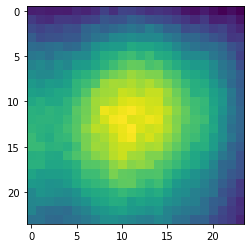

In [20]:
plt.imshow(np.abs(field_center[32-12:32+12,32-14:32+10]))

In [21]:
field_right_peak = field_center[32-12:32+12,32-14:32+10]

In [22]:
fit_amp_x_lst,se_amp_x_lst,fit_amp_y_lst,se_amp_y_lst,f_left = prop_astigmatic_fit_adaptive(field_left_peak,z_props[12:],Ns[12:],Ms[12:])

[['normal', 'normal']]
Propagate for 4000 units [mm]
Step 0/1
[['normal', 'normal']]
Propagate for 4250 units [mm]
Step 0/1
[['normal', 'normal']]
Propagate for 4500 units [mm]
Step 0/1
[['normal', 'normal']]
Propagate for 4750 units [mm]
Step 0/1
[['normal', 'normal']]
Propagate for 5000 units [mm]
Step 0/1
[['normal', 'normal']]
Propagate for 5250 units [mm]
Step 0/1
[['normal', 'normal']]
Propagate for 5500 units [mm]
Step 0/1
[['normal', 'normal']]
Propagate for 5750 units [mm]
Step 0/1
[['normal', 'normal']]
Propagate for 6000 units [mm]
Step 0/1
[['normal', 'normal']]
Propagate for 6250 units [mm]
Step 0/1
[['normal', 'normal']]
Propagate for 6500 units [mm]
Step 0/1
[['normal', 'normal']]
Propagate for 6750 units [mm]
Step 0/1
[['normal', 'normal']]
Propagate for 7000 units [mm]
Step 0/1
[['normal', 'normal']]
Propagate for 7250 units [mm]
Step 0/1
[['normal', 'normal']]
Propagate for 7500 units [mm]
Step 0/1
[['normal', 'normal']]
Propagate for 7750 units [mm]
Step 0/1
[['norma

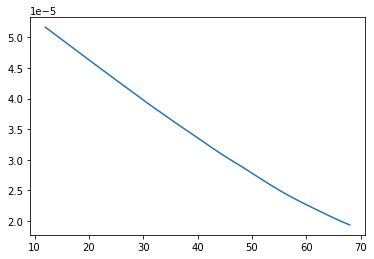

In [26]:
plt.plot(np.arange(12,len(fit_amp_x_lst)+12),np.array(fit_amp_x_lst)[:,2])

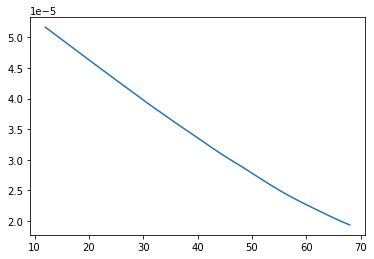

In [27]:
plt.plot(np.arange(12,len(fit_amp_y_lst)+12),np.array(fit_amp_x_lst)[:,2])

In [24]:
fit_amp_x_lst,se_amp_x_lst,fit_amp_y_lst,se_amp_y_lst,f_right = prop_astigmatic_fit_adaptive(field_right_peak,z_props[12:],Ns[12:],Ms[12:])

[['normal', 'normal']]
Propagate for 4000 units [mm]
Step 0/1
[['normal', 'normal']]
Propagate for 4250 units [mm]
Step 0/1
[['normal', 'normal']]
Propagate for 4500 units [mm]
Step 0/1
[['normal', 'normal']]
Propagate for 4750 units [mm]
Step 0/1
[['normal', 'normal']]
Propagate for 5000 units [mm]
Step 0/1
[['normal', 'normal']]
Propagate for 5250 units [mm]
Step 0/1
[['normal', 'normal']]
Propagate for 5500 units [mm]
Step 0/1
[['normal', 'normal']]
Propagate for 5750 units [mm]
Step 0/1
[['normal', 'normal']]
Propagate for 6000 units [mm]
Step 0/1
[['normal', 'normal']]
Propagate for 6250 units [mm]
Step 0/1
[['normal', 'normal']]
Propagate for 6500 units [mm]
Step 0/1
[['normal', 'normal']]
Propagate for 6750 units [mm]
Step 0/1
[['normal', 'normal']]
Propagate for 7000 units [mm]
Step 0/1
[['normal', 'normal']]
Propagate for 7250 units [mm]
Step 0/1
[['normal', 'normal']]
Propagate for 7500 units [mm]
Step 0/1
[['normal', 'normal']]
Propagate for 7750 units [mm]
Step 0/1
[['norma

In [1]:
plt.plot(np.arange(12,len(fit_amp_x_lst)+12),np.array(fit_amp_x_lst)[:,2])

NameError: name 'plt' is not defined

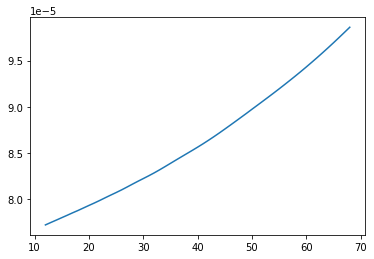

In [30]:
plt.plot(np.arange(12,len(fit_amp_y_lst)+12),np.array(fit_amp_x_lst)[:,2])

In [21]:
# Attempt at calculating spectral density for two subsets of the example data as separate signals
# 1 is peak left, 2 is peak right, and the windows must be scaled appropriately if we subset them differently
window_extent_1 = window_extent*field_left_peak.shape[0]/grid_dim
window_extent_2 = window_extent*field_right_peak.shape[0]/grid_dim
#window_extent_1 = window_extent
#window_extent_2 = window_extent

def coherence(E1_series,E2_series,Ms,prop_distance):
    # Harness to calculate the coherence of the two signals
    # Takes the two fields over the prop_distance along with the associated non-padded sampling number for the propagations at those distance
    # Returns the coherence value as a function of the spatial frequency
    
    S_xy = spectral_density(E1_series,E2_series,Ms,prop_distance)
    S_xx = spectral_density(E1_series,E1_series,Ms,prop_distance)
    S_yy = spectral_density(E2_series,E2_series,Ms,prop_distance)
    gamma = np.abs(S_xy)**2/(S_xx*S_yy)
    return gamma
    


def spectral_density(E1_series,E2_series,Ms,prop_distance):
    # Function for calculating the spectral density between two signals
    # Takes the two fields over the prop_distance along with the associated non-padded sampling number
    # Returns the coherence value as a function of the spatial frequency
    
    P_series = 1j*np.zeros((len(E1_series),2*len(E2_series)-1))
    # Treating the autocorrelation as an convolution, calculated by the for loop, where the transverse spatial integrals need to be handled first
    for i,E1 in enumerate(E1_series):
        for j,E2 in enumerate(E2_series):
            P_series[i,j+i] = get_power(E1,E2,Ms[i],Ms[j])
            #P_series[i,j] = np.sum(np.conjugate(E1)*E2)*window_extent/M
    correlation_func = np.sum(P_series,axis=0)/prop_distance
    spectral_density = np.fft.fft(np.fft.fftshift(correlation_func))
    return spectral_density
                         
def get_power(E1,E2,M1,M2):
    # Helper function for the spectral_density calculation
    # Takes two individual transverse fields along with their respective non-padded sampling numbers and integrates their product over the transverse plane
    # Returns the integral approximation
    
    # Have to resample to carry out the integral
    x1 = np.linspace(-window_extent_1*E1.shape[0]/M1/2,window_extent_1*E1.shape[0]/M1/2,E1.shape[0])
    y1 = x1
    u_spline_E1_real = interp2d(x1,y1,np.real(E1),kind='cubic')
    u_spline_E1_imag = interp2d(x1,y1,np.imag(E1),kind='cubic')
    x = np.linspace(-window_extent_2*E2.shape[0]/M2/2,window_extent_2*E2.shape[0]/M2/2,E2.shape[0])
    y = x
    xx,yy = np.meshgrid(x, y)
    E1_new_real = u_spline_E1_real(xx[0,:],yy[:,0])
    E1_new_imag = u_spline_E1_imag(xx[0,:],yy[:,0]) 
    return np.sum(np.conjugate(E1_new_real+1j*E1_new_imag)*E2)*(window_extent_2/M2)**2


NameError: name 'field_left_peak' is not defined

In [31]:
gamma_two_pulse = coherence(f_left,f_right,Ms,14)

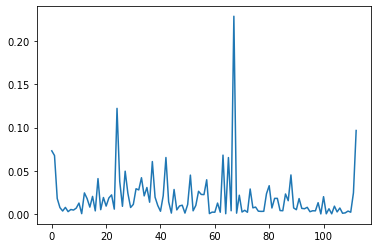

In [32]:
plt.plot(np.abs(gamma_two_pulse))

In [58]:
f_left[0].shape,f_right[0].shape

((1562, 1562), (1562, 1562))

In [58]:
gamma = coherence(f,f,Ms,14)
gamma

array([ 0.92453052-0.38110801j, -0.18631645-0.98248979j,
       -0.79600112+0.60529515j,  0.36916331+0.92936454j,
        0.54164834+0.84060518j,  0.97143832-0.2372922j ,
       -0.97286105+0.23139009j,  0.51978333+0.85429813j,
        0.56774037-0.82320767j,  0.42396778-0.90567727j,
        0.19079646-0.98162962j, -0.91123033+0.41189719j,
        0.55890044+0.82923477j, -0.97947109+0.20158467j,
       -0.99378514-0.11131529j, -0.83584328-0.54896814j,
        0.88880734-0.45828104j,  0.99672698+0.08084142j,
       -0.96062279+0.27785582j, -0.63771501+0.7702724j ,
       -0.73570735+0.67729956j, -0.20768639-0.97819546j,
       -0.74434114+0.66779957j, -0.92691082+0.37528167j,
        0.00168917+0.99999857j, -0.16730467+0.98590524j,
       -0.37286371+0.92788612j, -0.57321144+0.8194075j ,
       -0.76753564-0.64100628j, -0.6399185 -0.76844278j,
       -0.74122689-0.67125457j, -0.30500298-0.9523514j ,
       -0.11220606-0.99368496j, -0.25891636-0.96589975j,
       -0.94829185-0.31739969j,

In [62]:
np.abs(gamma)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [1]:
def first_order_coherence(E_series,Ms,prop_distance):
    # Function to calculate first order coherence
    # Takes an individual field propagated over a distance prop_distance with respective non-padded sampling numbers Ms
    # Returns the integral 
    conv_matrix = 1j*np.zeros((len(E_series),2*len(E_series)-1))
    for i,Estar in enumerate(E_series):
        for j,E in enumerate(E_series):
            conv_matrix[i,i+j] = get_product(Estar,E,Ms[i],Ms[j])
    conv = np.sum(conv_matrix,axis=0)
    normalization_factor = np.average([np.sum(np.abs(E)**2)*(window_extent/Ms[i])**2 for i,E in enumerate(E_series)])
    return conv/normalization_factor/prop_distance
    
def get_product(E1,E2,M1,M2):
    # Helper function to calculate the spatial integrals for the first_order_coherence function
    # Takes transverse planes E1 and E2 with different sampling M1 and M2
    # Returns the spatial integral for those two planes estimated
    
    # Have to resample to carry out the approximation to the integral
    x1 = np.linspace(-window_extent*E1.shape[0]/M1/2,window_extent*E1.shape[0]/M1/2,E1.shape[0])
    y1 = x1
    u_spline_E1_real = interp2d(x1,y1,np.real(E1),kind='cubic')
    u_spline_E1_imag = interp2d(x1,y1,np.imag(E1),kind='cubic')
    x = np.linspace(-window_extent*E2.shape[0]/M2/2,window_extent*E2.shape[0]/M2/2,E2.shape[0])
    y = x
    xx,yy = np.meshgrid(x, y)
    E1_new_real = u_spline_E1_real(xx[0,:],yy[:,0])
    E1_new_imag = u_spline_E1_imag(xx[0,:],yy[:,0]) 
    return np.sum(np.conjugate(E1_new_real+1j*E1_new_imag)*E2)*(window_extent/M2)**2

In [72]:
# Test on original simulated gaussian
g1_test = first_order_coherence(f,Ms[12:],14)

Text(0, 0.5, '$g^{(1)}$')

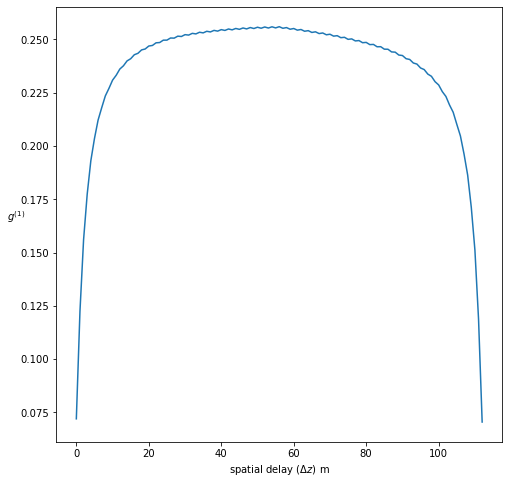

In [75]:
plt.figure(figsize=(8,8))
plt.plot(np.abs(g1_test))
plt.xlabel('spatial delay $(\Delta z)$ m')
plt.ylabel('$g^{(1)}$',rotation=0)

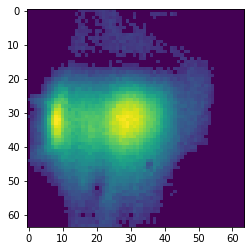

In [ ]:
plt.imshow(np.abs(field_center))

In [22]:
# Application to bimodal image
fit_amp_x_lst,se_amp_x_lst,fit_amp_y_lst,se_amp_y_lst,f_two_peak = prop_astigmatic_fit_adaptive(field_center,z_props[12:],Ns[12:],Ms[12:])

[['normal', 'normal']]
Propagate for 4000 units [mm]
Step 0/1
[['normal', 'normal']]
Propagate for 4250 units [mm]
Step 0/1
[['normal', 'normal']]
Propagate for 4500 units [mm]
Step 0/1
[['normal', 'normal']]
Propagate for 4750 units [mm]
Step 0/1
[['normal', 'normal']]
Propagate for 5000 units [mm]
Step 0/1
[['normal', 'normal']]
Propagate for 5250 units [mm]
Step 0/1
[['normal', 'normal']]
Propagate for 5500 units [mm]
Step 0/1
[['normal', 'normal']]
Propagate for 5750 units [mm]
Step 0/1
[['normal', 'normal']]
Propagate for 6000 units [mm]
Step 0/1
[['normal', 'normal']]
Propagate for 6250 units [mm]
Step 0/1
[['normal', 'normal']]
Propagate for 6500 units [mm]
Step 0/1
[['normal', 'normal']]
Propagate for 6750 units [mm]
Step 0/1
[['normal', 'normal']]
Propagate for 7000 units [mm]
Step 0/1
[['normal', 'normal']]
Propagate for 7250 units [mm]
Step 0/1
[['normal', 'normal']]
Propagate for 7500 units [mm]
Step 0/1
[['normal', 'normal']]
Propagate for 7750 units [mm]
Step 0/1
[['norma

/home/buzz/anaconda3/lib/python3.9/site-packages/scipy/optimize/minpack.py:476: RuntimeWarning: Number of calls to function has reached maxfev = 800.
  warnings.warn(errors[info][0], RuntimeWarning)


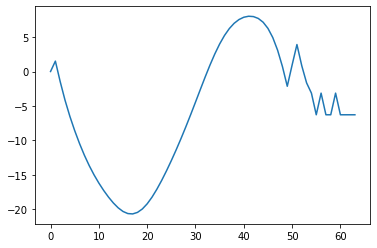

In [23]:
plt.plot(np.unwrap(np.angle(field_center[30])))

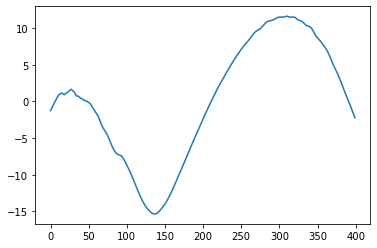

In [53]:
plt.plot(np.unwrap(np.angle((f_two_peak[0][600][300:700]))))

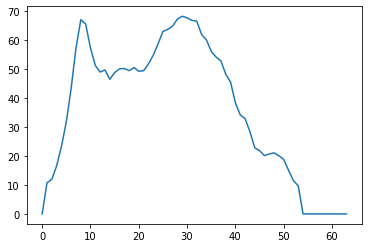

In [26]:
plt.plot(np.abs(field_center[30]))

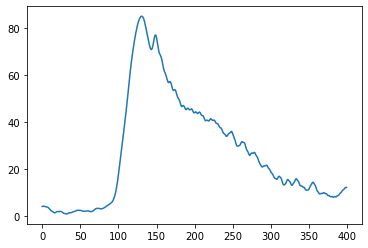

In [27]:
plt.plot(np.abs(f_two_peak[0][600][300:700]))

In [62]:
g1 = first_order_coherence(f_two_peak,Ms[12:],14)

In [87]:
np.r_[-z_props[12:][::-1] + 4,z_props[12:-1] - 4]

array([-14.  , -13.75, -13.5 , -13.25, -13.  , -12.75, -12.5 , -12.25,
       -12.  , -11.75, -11.5 , -11.25, -11.  , -10.75, -10.5 , -10.25,
       -10.  ,  -9.75,  -9.5 ,  -9.25,  -9.  ,  -8.75,  -8.5 ,  -8.25,
        -8.  ,  -7.75,  -7.5 ,  -7.25,  -7.  ,  -6.75,  -6.5 ,  -6.25,
        -6.  ,  -5.75,  -5.5 ,  -5.25,  -5.  ,  -4.75,  -4.5 ,  -4.25,
        -4.  ,  -3.75,  -3.5 ,  -3.25,  -3.  ,  -2.75,  -2.5 ,  -2.25,
        -2.  ,  -1.75,  -1.5 ,  -1.25,  -1.  ,  -0.75,  -0.5 ,  -0.25,
         0.  ,   0.  ,   0.25,   0.5 ,   0.75,   1.  ,   1.25,   1.5 ,
         1.75,   2.  ,   2.25,   2.5 ,   2.75,   3.  ,   3.25,   3.5 ,
         3.75,   4.  ,   4.25,   4.5 ,   4.75,   5.  ,   5.25,   5.5 ,
         5.75,   6.  ,   6.25,   6.5 ,   6.75,   7.  ,   7.25,   7.5 ,
         7.75,   8.  ,   8.25,   8.5 ,   8.75,   9.  ,   9.25,   9.5 ,
         9.75,  10.  ,  10.25,  10.5 ,  10.75,  11.  ,  11.25,  11.5 ,
        11.75,  12.  ,  12.25,  12.5 ,  12.75,  13.  ,  13.25,  13.5 ,
      

Text(0, 0.5, '$g^{(1)}$')

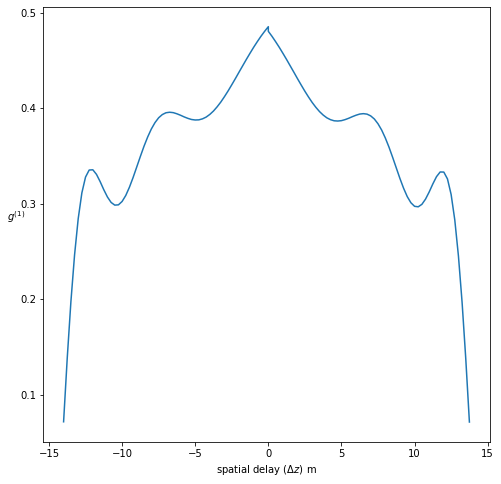

In [107]:
plt.figure(figsize=(8,8))
plt.plot(np.r_[-z_props[12:][::-1] + 4,z_props[12:-1] - 4],np.abs(g1))
plt.xlabel('spatial delay $(\Delta z)$ m')
plt.ylabel('$g^{(1)}$',rotation=0)